<a href="https://colab.research.google.com/github/rajkaran08/ML/blob/main/RavelingDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Data Pre-processing

In [ ]:
import matplotlib.pyplot as plt
import os
import glob
import skimage
from skimage import io, color
from skimage.feature.texture import greycomatrix, greycoprops
import numpy as np
import pandas as pd
from scipy.stats import kurtosis
from scipy.stats import skew
from scipy.stats import entropy
import cv2 
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, callbacks
% matplotlib inline

In [ ]:
train_root = '/content/drive/MyDrive/CE784/mod_ravelling_dataset/train'

In [ ]:
classes = ['Non_raveling', 'Raveling']

Showing an image from each class

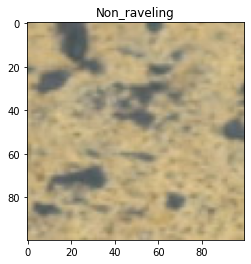

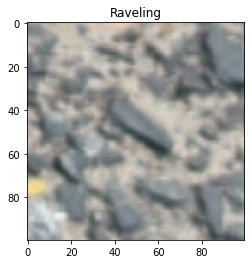

In [ ]:
for i in range(2):
  path = os.path.join(train_root,classes[i],'*')
  path = glob.glob(path)
  image = io.imread(path[4])  

  # plotting the original image
  fig, ax = plt.subplots()
  ax.set_title(classes[i])
  fig.set_figwidth(10)
  ax.imshow(image)
  # ax.imshow(image[:,:,0]) plots only red channel

In [ ]:
def featureExtractor_Train(train_root,classes):
  b_mean = []
  g_mean = []
  r_mean = []

  b_std = []
  g_std = []
  r_std = []

  b_kurtosis = []
  g_kurtosis = []
  r_kurtosis = []

  b_skew = []
  g_skew = []
  r_skew = []

  b_entropy = []
  g_entropy = []
  r_entropy = []

  b_range = []
  g_range = []
  r_range = []

  contrast0 = []
  asm0 = []
  correl0 = []
  entropy0 = []

  energy0 = []
  homogeneity0 = []
  dissimilarity0 = []

  contrast1 = []
  asm1 = []
  correl1 = []
  entropy1 = []
  energy1 = []
  homogeneity1 = []
  dissimilarity1 = []

  contrast2 = []
  asm2 = []
  correl2 = []
  entropy2 = []
  energy2 = []
  homogeneity2 = []
  dissimilarity2 = []

  contrast3 = []
  asm3 = []
  correl3 = []
  entropy3 = []
  energy3 = []
  homogeneity3 = []
  dissimilarity3 = []

  labels = []

  for i in range(2):
    paths = os.path.join(train_root,classes[i],'*')
    paths = glob.glob(paths)

    for path in paths:
      img = cv2.imread(path)
      greyImg = cv2.imread(path,cv2.IMREAD_GRAYSCALE)

      if(i==0):
        labels.append(0)
      else:
        labels.append(1)

      g0 = greycomatrix(greyImg, [1], [0])
      contrast0.append(greycoprops(g0,'contrast')[0][0])
      asm0.append(greycoprops(g0,'ASM')[0][0])
      correl0.append(greycoprops(g0,'correlation')[0][0])
      entropy0.append(skimage.measure.shannon_entropy(np.reshape(g0,(256,256))))
      energy0.append(greycoprops(g0,'energy')[0][0])
      homogeneity0.append(greycoprops(g0,'homogeneity')[0][0])
      dissimilarity0.append(greycoprops(g0,'dissimilarity')[0][0])

      g1 = greycomatrix(greyImg, [1], [np.pi/4])
      contrast1.append(greycoprops(g1,'contrast')[0][0])
      asm1.append(greycoprops(g1,'ASM')[0][0])
      correl1.append(greycoprops(g1,'correlation')[0][0])
      entropy1.append(skimage.measure.shannon_entropy(np.reshape(g1,(256,256))))
      energy1.append(greycoprops(g1,'energy')[0][0])
      homogeneity1.append(greycoprops(g1,'homogeneity')[0][0])
      dissimilarity1.append(greycoprops(g1,'dissimilarity')[0][0])

      g2 = greycomatrix(greyImg, [1], [np.pi/2])
      contrast2.append(greycoprops(g2,'contrast')[0][0])
      asm2.append(greycoprops(g2,'ASM')[0][0])
      correl2.append(greycoprops(g2,'correlation')[0][0])
      entropy2.append(skimage.measure.shannon_entropy(np.reshape(g2,(256,256))))
      energy2.append(greycoprops(g2,'energy')[0][0])
      homogeneity2.append(greycoprops(g2,'homogeneity')[0][0])
      dissimilarity2.append(greycoprops(g2,'dissimilarity')[0][0])

      g3 = greycomatrix(greyImg, [1], [3*np.pi/4])
      contrast3.append(greycoprops(g3,'contrast')[0][0])
      asm3.append(greycoprops(g3,'ASM')[0][0])
      correl3.append(greycoprops(g3,'correlation')[0][0])
      entropy3.append(skimage.measure.shannon_entropy(np.reshape(g3,(256,256))))
      energy3.append(greycoprops(g3,'energy')[0][0])
      homogeneity3.append(greycoprops(g3,'homogeneity')[0][0])
      dissimilarity3.append(greycoprops(g3,'dissimilarity')[0][0])

      b = img[:,:,0]
      g = img[:,:,1]
      r = img[:,:,2]

      b_mean.append(np.mean(b))
      g_mean.append(np.mean(g))
      r_mean.append(np.mean(r))

      b_std.append(np.std(b))
      g_std.append(np.std(g))
      r_std.append(np.std(r))

      b_kurtosis.append(np.mean(kurtosis(b)))
      g_kurtosis.append(np.mean(kurtosis(g)))
      r_kurtosis.append(np.mean(kurtosis(r)))

      b_skew.append(np.mean(skew(b)))
      g_skew.append(np.mean(skew(g)))
      r_skew.append(np.mean(skew(r)))

      b_entropy.append(np.mean(entropy(b)))
      g_entropy.append(np.mean(entropy(g)))
      r_entropy.append(np.mean(entropy(r)))

      b_range.append(max(map(max,b))-min(map(min,b)))
      g_range.append(max(map(max,g))-min(map(min,g)))
      r_range.append(max(map(max,r))-min(map(min,r)))
  
  # columns = [f'feat{i}' for i in range(42)]

  
  columns = [f'feat{i}' for i in range(38)]
  columns.append('Label')

  #df = pd.DataFrame(list(zip(b_mean,g_mean,r_mean,b_std,g_std,r_std,b_kurtosis,g_kurtosis,r_kurtosis,b_skew,g_skew,r_skew,b_entropy,g_entropy,r_entropy,b_range,g_range,r_range,contrast0,asm0,correl0,entropy0,contrast1,asm1,correl1,entropy1,contrast2,asm2,correl2,entropy2,contrast3,asm3,correl3,entropy3,labels)),columns = columns)
  df = pd.DataFrame(list(zip(b_mean,g_mean,r_mean,b_std,g_std,r_std,b_kurtosis,g_kurtosis,r_kurtosis,b_skew,g_skew,r_skew,b_entropy,g_entropy,r_entropy,b_range,g_range,r_range,contrast0,asm0,correl0,contrast1,asm1,correl1,contrast2,asm2,correl2,contrast3,asm3,correl3,entropy0,entropy1,entropy2,entropy3,energy0,energy1,energy2,energy3,labels)),columns = columns)

  return df

In [ ]:
df_train = featureExtractor_Train(train_root,classes)

In [ ]:
df_train = df_train.sample(frac = 1)

In [ ]:
df_train.shape

(700, 39)

In [ ]:
df_train.head()

,feat0,feat1,feat2,feat3,feat4,feat5,feat6,feat7,feat8,feat9,feat10,feat11,feat12,feat13,feat14,feat15,feat16,feat17,feat18,feat19,feat20,feat21,feat22,feat23,feat24,feat25,feat26,feat27,feat28,feat29,feat30,feat31,feat32,feat33,feat34,feat35,feat36,feat37,Label
222,121.6774,143.2987,151.3682,15.092844,27.246458,34.668987,-0.775060,-0.999846,-1.012703,-0.231695,-0.269361,-0.232979,4.597633,4.586920,4.578636,94,123,-104,61.464646,0.000527,0.960556,151.199163,0.000373,0.902809,97.542727,0.000445,0.937166,147.675339,0.000379,0.905097,0.406255,0.482679,0.446229,0.476010,0.022959,0.019325,0.021094,0.019462,0
18,150.6902,149.9982,148.7938,19.185193,20.455987,21.623776,-0.234625,-0.362116,-0.365097,-0.011825,0.059129,0.074001,4.597591,4.596432,4.595250,124,-126,-115,63.782929,0.000659,0.924781,112.791552,0.000521,0.867058,92.200404,0.000594,0.891294,173.845934,0.000456,0.795083,0.389509,0.428824,0.413462,0.458110,0.025664,0.022831,0.024362,0.021348,0
208,133.4525,127.1820,119.8558,20.585518,22.147575,24.873058,0.047915,0.030987,0.004833,0.342307,0.383818,0.369921,4.594390,4.591939,4.586617,-111,-113,-109,29.541616,0.000976,0.971101,76.563820,0.000650,0.925106,41.937778,0.000838,0.959094,57.918886,0.000686,0.943389,0.333881,0.406956,0.367385,0.388881,0.031248,0.025489,0.028943,0.026187,0
594,131.7341,135.9135,139.1947,34.631896,38.802900,42.150295,-0.182501,-0.267536,-0.331330,0.187840,0.170169,0.148682,4.576127,4.572726,4.569995,-66,-75,-72,102.570404,0.000377,0.966661,293.241404,0.000270,0.904843,186.424141,0.000320,0.939551,244.366391,0.000281,0.920698,0.500659,0.562597,0.537000,0.553749,0.019404,0.016441,0.017876,0.016766,1
116,138.4487,136.4047,137.9859,34.104375,33.303984,33.691974,1.050231,1.029936,1.006476,-1.067498,-0.993565,-0.947349,4.571966,4.572652,4.572580,-48,-43,-34,72.895960,0.000694,0.967448,177.931640,0.000524,0.920622,158.961313,0.000599,0.929040,242.860014,0.000490,0.891648,0.446731,0.488851,0.482990,0.508200,0.026348,0.022896,0.024476,0.022146,0


In [ ]:
# df_train.to_csv('traindata.csv')

test-train Split

In [ ]:
X_train = df_train.drop('Label', axis=1)
y_train = df_train.Label

In [ ]:
input_shape = [X_train.shape[1]]

# Fitted ANN

In [ ]:
model = keras.Sequential([
    layers.BatchNormalization(input_shape=input_shape),
    layers.Dense(16, activation='relu'),
    layers.Dropout(0.2),
    layers.BatchNormalization(),
    layers.Dense(8, activation='relu'),
    layers.Dropout(0.2),
    layers.BatchNormalization(),
    layers.Dense(1,activation = 'sigmoid'),
])

In [ ]:
opt = keras.optimizers.Adam()

loss_fn = keras.losses.BinaryCrossentropy()
model.compile(
    optimizer=opt,
    loss=loss_fn,
)

Epoch 1/250
40/40 [==============================] - 5s 9ms/step - loss: 0.8770 - val_loss: 0.8164
Epoch 2/250
40/40 [==============================] - 0s 5ms/step - loss: 0.7044 - val_loss: 0.7613
Epoch 3/250
40/40 [==============================] - 0s 5ms/step - loss: 0.6035 - val_loss: 0.7436
Epoch 4/250
40/40 [==============================] - 0s 5ms/step - loss: 0.5430 - val_loss: 0.6663
Epoch 5/250
40/40 [==============================] - 0s 4ms/step - loss: 0.4993 - val_loss: 0.6062
Epoch 6/250
40/40 [==============================] - 0s 4ms/step - loss: 0.5101 - val_loss: 0.5659
Epoch 7/250
40/40 [==============================] - 0s 4ms/step - loss: 0.4931 - val_loss: 0.5450
Epoch 8/250
40/40 [==============================] - 0s 5ms/step - loss: 0.4630 - val_loss: 0.5142
Epoch 9/250
40/40 [==============================] - 0s 5ms/step - loss: 0.4687 - val_loss: 0.4838
Epoch 10/250
40/40 [==============================] - 0s 5ms/step - loss: 0.4544 - val_loss: 0.4730
Epoch 11/

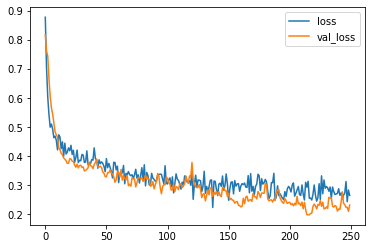

In [ ]:
epochs = 250
history = model.fit(
    X_train, y_train,
    validation_split=0.1,
    batch_size=16,
    epochs=epochs,
    verbose=1,
)

history_df = pd.DataFrame(history.history)
history_df.loc[0:, ['loss', 'val_loss']].plot()
print(("Minimum Validation Loss: {:0.4f}").format(history_df['val_loss'].min()))

# Fitting Logistic Regression Model

In [ ]:
model1 = keras.Sequential([
    layers.BatchNormalization(input_shape=input_shape),
    layers.Dense(1, activation='sigmoid'),

])

In [ ]:
opt = keras.optimizers.Adam()

loss_fn = keras.losses.BinaryCrossentropy()
model1.compile(
    optimizer=opt,
    loss=loss_fn,
)

Epoch 1/250
20/20 [==============================] - 1s 12ms/step - loss: 0.5958 - val_loss: 3.5601
Epoch 2/250
20/20 [==============================] - 0s 4ms/step - loss: 0.5556 - val_loss: 2.1647
Epoch 3/250
20/20 [==============================] - 0s 3ms/step - loss: 0.5206 - val_loss: 1.5224
Epoch 4/250
20/20 [==============================] - 0s 4ms/step - loss: 0.5066 - val_loss: 1.1081
Epoch 5/250
20/20 [==============================] - 0s 3ms/step - loss: 0.4871 - val_loss: 0.8691
Epoch 6/250
20/20 [==============================] - 0s 4ms/step - loss: 0.4689 - val_loss: 0.7131
Epoch 7/250
20/20 [==============================] - 0s 3ms/step - loss: 0.4571 - val_loss: 0.6181
Epoch 8/250
20/20 [==============================] - 0s 3ms/step - loss: 0.4651 - val_loss: 0.5548
Epoch 9/250
20/20 [==============================] - 0s 3ms/step - loss: 0.4375 - val_loss: 0.5196
Epoch 10/250
20/20 [==============================] - 0s 4ms/step - loss: 0.4413 - val_loss: 0.4975
Epoch 11

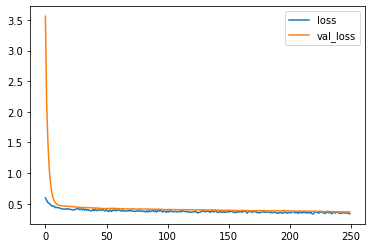

In [ ]:
epochs = 250
history1 = model1.fit(
    X_train, y_train,
    validation_split=0.1,
    batch_size=32,
    epochs=epochs,
    verbose=1,
)

history_df1 = pd.DataFrame(history1.history)
history_df1.loc[0:, ['loss', 'val_loss']].plot()
print(("Minimum Validation Loss: {:0.4f}").format(history_df1['val_loss'].min()))

# Prediction-part

In [ ]:
def featureExtractor_Test(root):
  b_mean = []
  g_mean = []
  r_mean = []

  b_std = []
  g_std = []
  r_std = []

  b_kurtosis = []
  g_kurtosis = []
  r_kurtosis = []

  b_skew = []
  g_skew = []
  r_skew = []

  b_entropy = []
  g_entropy = []
  r_entropy = []

  b_range = []
  g_range = []
  r_range = []

  contrast0 = []
  asm0 = []
  correl0 = []
  entropy0 = []
  entropy0 = []
  energy0 = []
  homogeneity0 = []
  dissimilarity0 = []

  contrast1 = []
  asm1 = []
  correl1 = []
  entropy1 = []
  
  energy1 = []
  homogeneity1 = []
  dissimilarity1 = []

  contrast2 = []
  asm2 = []
  correl2 = []
  entropy2 = []
  energy2 = []
  homogeneity2 = []
  dissimilarity2 = []

  contrast3 = []
  asm3 = []
  correl3 = []
  entropy3 = []
  energy3 = []
  homogeneity3 = []
  dissimilarity3 = []

  filename = []

  
  paths = os.path.join(root,'*')
  paths = glob.glob(paths)

  for path in paths:
    img = cv2.imread(path)
    greyImg = cv2.imread(path,cv2.IMREAD_GRAYSCALE)
    filename.append(os.path.split(os.path.abspath(path))[-1])
    

    g0 = greycomatrix(greyImg, [1], [0])
    contrast0.append(greycoprops(g0,'contrast')[0][0])
    asm0.append(greycoprops(g0,'ASM')[0][0])
    correl0.append(greycoprops(g0,'correlation')[0][0])
    entropy0.append(skimage.measure.shannon_entropy(np.reshape(g0,(256,256))))
    energy0.append(greycoprops(g0,'energy')[0][0])
    homogeneity0.append(greycoprops(g0,'homogeneity')[0][0])
    dissimilarity0.append(greycoprops(g0,'dissimilarity')[0][0])

    g1 = greycomatrix(greyImg, [1], [np.pi/4])
    contrast1.append(greycoprops(g1,'contrast')[0][0])
    asm1.append(greycoprops(g1,'ASM')[0][0])
    correl1.append(greycoprops(g1,'correlation')[0][0])
    entropy1.append(skimage.measure.shannon_entropy(np.reshape(g1,(256,256))))
    energy1.append(greycoprops(g1,'energy')[0][0])
    homogeneity1.append(greycoprops(g1,'homogeneity')[0][0])
    dissimilarity1.append(greycoprops(g1,'dissimilarity')[0][0])

    g2 = greycomatrix(greyImg, [1], [np.pi/2])
    contrast2.append(greycoprops(g2,'contrast')[0][0])
    asm2.append(greycoprops(g2,'ASM')[0][0])
    correl2.append(greycoprops(g2,'correlation')[0][0])
    entropy2.append(skimage.measure.shannon_entropy(np.reshape(g2,(256,256))))
    energy2.append(greycoprops(g2,'energy')[0][0])
    homogeneity2.append(greycoprops(g2,'homogeneity')[0][0])
    dissimilarity2.append(greycoprops(g2,'dissimilarity')[0][0])

    g3 = greycomatrix(greyImg, [1], [3*np.pi/4])
    contrast3.append(greycoprops(g3,'contrast')[0][0])
    asm3.append(greycoprops(g3,'ASM')[0][0])
    correl3.append(greycoprops(g3,'correlation')[0][0])
    entropy3.append(skimage.measure.shannon_entropy(np.reshape(g3,(256,256))))
    energy3.append(greycoprops(g3,'energy')[0][0])
    homogeneity3.append(greycoprops(g3,'homogeneity')[0][0])
    dissimilarity3.append(greycoprops(g3,'dissimilarity')[0][0])

    b = img[:,:,0]
    g = img[:,:,1]
    r = img[:,:,2]

    b_mean.append(np.mean(b))
    g_mean.append(np.mean(g))
    r_mean.append(np.mean(r))

    b_std.append(np.std(b))
    g_std.append(np.std(g))
    r_std.append(np.std(r))

    b_kurtosis.append(np.mean(kurtosis(b)))
    g_kurtosis.append(np.mean(kurtosis(g)))
    r_kurtosis.append(np.mean(kurtosis(r)))

    b_skew.append(np.mean(skew(b)))
    g_skew.append(np.mean(skew(g)))
    r_skew.append(np.mean(skew(r)))

    b_entropy.append(np.mean(entropy(b)))
    g_entropy.append(np.mean(entropy(g)))
    r_entropy.append(np.mean(entropy(r)))

    b_range.append(max(map(max,b))-min(map(min,b)))
    g_range.append(max(map(max,g))-min(map(min,g)))
    r_range.append(max(map(max,r))-min(map(min,r)))
  
  
  columns = [f'feat{i}' for i in range(38)]
  columns.append('filename')
  df = pd.DataFrame(list(zip(b_mean,g_mean,r_mean,b_std,g_std,r_std,b_kurtosis,g_kurtosis,r_kurtosis,b_skew,g_skew,r_skew,b_entropy,g_entropy,r_entropy,b_range,g_range,r_range,contrast0,asm0,correl0,contrast1,asm1,correl1,contrast2,asm2,correl2,contrast3,asm3,correl3,entropy0,entropy1,entropy2,entropy3,energy0,energy1,energy2,energy3,filename)),columns = columns)
  return df

In [ ]:
test_root = '/content/drive/MyDrive/CE784/mod_ravelling_dataset/test'
df_test = featureExtractor_Test(test_root)

In [ ]:
df_test.head()

,feat0,feat1,feat2,feat3,feat4,feat5,feat6,feat7,feat8,feat9,feat10,feat11,feat12,feat13,feat14,feat15,feat16,feat17,feat18,feat19,feat20,feat21,feat22,feat23,feat24,feat25,feat26,feat27,feat28,feat29,feat30,feat31,feat32,feat33,feat34,feat35,feat36,feat37,filename
0,117.0948,118.7387,122.8148,42.979756,43.776537,44.021968,-0.495498,-0.405742,-0.191894,-0.131078,0.103096,0.279812,4.536327,4.539081,4.545067,-7,-8,-16,155.571010,0.000358,0.959008,321.337823,0.000289,0.915304,265.533737,0.000313,0.929865,435.197735,0.000270,0.885259,0.527769,0.560973,0.554149,0.575553,0.018915,0.017005,0.017687,0.016422,2.jpg
1,116.9660,117.2582,119.0971,28.830398,29.687370,28.686643,0.047825,0.077136,0.115154,0.548500,0.613597,0.666624,4.578882,4.577610,4.580387,-85,-81,-87,129.252626,0.000496,0.924247,156.781553,0.000438,0.908603,117.910505,0.000485,0.931365,293.511785,0.000359,0.828834,0.475452,0.484321,0.473777,0.525266,0.022261,0.020922,0.022021,0.018959,1.jpg
2,135.5442,137.8248,140.2583,28.910113,30.798921,34.016995,-0.698024,-0.823431,-0.917698,-0.137815,-0.127064,-0.144589,4.582359,4.580164,4.575437,-85,-89,-83,102.691111,0.000394,0.948147,229.463320,0.000294,0.884348,153.945152,0.000338,0.922379,247.040914,0.000287,0.875438,0.480191,0.537690,0.515146,0.543661,0.019858,0.017160,0.018378,0.016932,3.jpg
3,136.1576,140.4098,143.4236,31.618478,34.448757,37.528016,-0.266099,-0.345425,-0.374153,-0.405392,-0.422143,-0.432456,4.578288,4.575565,4.572004,-74,-73,-70,182.738485,0.000321,0.925335,264.493725,0.000276,0.892383,127.650909,0.000359,0.947903,306.368228,0.000269,0.875367,0.534743,0.557309,0.512650,0.564508,0.017904,0.016616,0.018941,0.016403,185.jpg
4,144.2273,146.3122,149.2683,25.611326,27.700659,29.452917,-0.247343,-0.339101,-0.349759,-0.066258,-0.082478,-0.122495,4.589616,4.587490,4.585835,-63,-58,-54,210.876061,0.000309,0.864209,299.938068,0.000282,0.806246,158.193838,0.000345,0.898100,375.060810,0.000262,0.757728,0.528709,0.547190,0.506908,0.560886,0.017572,0.016794,0.018581,0.016182,257.jpg


In [ ]:
X_test = df_test.drop('filename', axis=1)
predictions = model.predict(X_test)
classes = ['Raveling' if predictions[i]>0.5 else 'Non_raveling' for i in range(len(predictions))]
df_test['class'] = classes
df_new = pd.DataFrame([df_test['filename'], df_test['class']]).transpose()
df_new['filenames'] = df_new['filename']
for i in range(len(df_new)):
  df_new['filenames'][i] = int(df_new['filename'][i].strip().split('.')[0])
dff = df_new.sort_values('filenames')

In [ ]:
dff.head()

,filename,class,filenames
1,1.jpg,Non_raveling,1
0,2.jpg,Raveling,2
2,3.jpg,Raveling,3
84,4.jpg,Raveling,4
72,5.jpg,Non_raveling,5


In [ ]:
dff.tail()

,filename,class,filenames
261,296.jpg,Raveling,296
218,297.jpg,Raveling,297
241,298.jpg,Non_raveling,298
260,299.jpg,Raveling,299
147,300.jpg,Non_raveling,300


In [ ]:
dff = dff.drop(['filenames'],axis = 1)

In [ ]:
dff.reset_index(drop=True, inplace=True)

In [ ]:
dff.to_csv('submissionn.csv',index = False)